# Reduction of dimensionality - wiht t-SNE #

In [2]:
'''
Plotting libraries
'''
import pandas as pd
import matplotlib.cm as cm
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from time import  time
#%matplotlib inline

'''
What we'll need for analysis, clustering, etc.
'''
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import datasets, decomposition
from sklearn.manifold import TSNE

'''
Of course the powerful RDKIT for cheminformatics <3
'''
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, MACCSkeys, Descriptors, Descriptors3D, Draw, rdMolDescriptors, Draw, PandasTools
from rdkit.DataManip.Metric.rdMetricMatrixCalc import GetTanimotoSimMat, GetTanimotoDistMat
from rdkit.Chem.Draw import IPythonConsole

'''
Some utilities
'''
import progressbar
from math import pi

#%config Completer.use_jedi = False
PandasTools.RenderImagesInAllDataFrames(images=True)

In [3]:
data_set = r'D:\Projetos academicos\Labmol\Code\chemspace\clinical_results\cli_temp\Sparse_Clinical_Hepato_mMol.csv'

data_space = pd.read_csv(data_set, delimiter=';', low_memory=False)

data_space.head(5)

,"ID,SMILES,Clinical_Filtered Abnormal Hepatic Fun _IC50,Clinical_Filtered Cholecystiti_IC50,Clinical_Filtered Cholelitiasi_IC50,Clinical_Filtered Cholestasi_IC50,Clinical_Filtered cholestatic Jaundice_IC50,Clinical_Filtered Hepatic Failure_IC50,Clinical_Filtered Hepatic necrosi_IC50,Clinical_Filtered Hepatic Steatosi_IC50,Clinical_Filtered Hepatiti_IC50,Clinical_Filtered HepatoBiliary disorder_IC50,Clinical_Filtered HepatoCellular injury_IC50,Clinical_Filtered Hepatomegaly_IC50,Clinical_Filtered Hepatotoxicity_IC50,Clinical_Filtered Hyperbilirubinemia_IC50,Clinical_Filtered Jaundice_IC50,Clinical_Filtered Liver Injury_IC50"
0,"0,CCN1CCN(Cc2ccc(Nc3ncc(F)c(-c4cc(F)c5nc(C)n(C..."
1,"1,CCCC(=O)Nc1ccc(OCC(O)CNC(C)C)c(C(C)=O)c1,-0...."
2,"2,C/C([O-])=N/c1nnc(S(N)(=O)=O)s1,4.5890352601..."
3,"3,CC(C)(C)C(=O)OCOP(=O)(COCCn1cnc2c(N)ncnc21)O..."
4,"4,COc1ccc2cccc(CCNC(C)=O)c2c1,2.44533052976864..."


In [19]:
smiles = list(data_space["SMILES_CANONICAL"])
smi=[Chem.MolFromSmiles(x) for x in smiles]

#Calculate descriptors
fps  = [AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=2048) for x in smi] # Morgan
#fps =  [MACCSkeys.GenMACCSKeys(x) for x in smi] # MACCSKeys
tanimoto_sim_mat_lower_triangle=GetTanimotoSimMat(fps) #This compute a similartity matrix between all the molecules
n_mol = len(fps)
similarity_matrix = np.ones([n_mol,n_mol])
i_lower= np.tril_indices(n=n_mol,m=n_mol,k=-1)
i_upper= np.triu_indices(n=n_mol,m=n_mol,k=1)
similarity_matrix[i_lower] = tanimoto_sim_mat_lower_triangle
similarity_matrix[i_upper] = similarity_matrix.T[i_upper] 
distance_matrix = np.subtract(1,similarity_matrix) #This is the similarity matrix of all vs all molecules in our table

In [20]:
#Diminui a dimensionalidade do meu modelo de uma matriz de 214x214 para uma matriz de 214x2
TSNE_sim = TSNE(n_components=2,init='random',random_state=336, angle = 0.24,perplexity=43, early_exaggeration = 36.0).fit_transform(distance_matrix) #Escolher os melhores valores dos hiperparametros!!
tsne_result = pd.DataFrame(data = TSNE_sim , columns=["TC1","TC2"]) # New table containing the tSNE results
tsne_result #A new table containing the tSNE results

,TC1,TC2
0,6.384309,-6.320334
1,6.390071,-6.382378
2,7.291758,-7.621020
3,-0.822113,7.458833
4,-0.781684,7.399560
...,...,...
209,0.927854,2.378239
210,1.565910,1.804592
211,-3.522062,-6.283058
212,-3.621150,-6.880764


In [21]:
#Diminui a dimensionalidade do meu modelo de uma matriz de 214x214 para uma matriz de 214x3
TSNE_sim2 = TSNE(n_components=3,init='pca',random_state=1000, angle = 0.5,perplexity=50, early_exaggeration = 12.0).fit_transform(distance_matrix) #Escolher os melhores valores dos hiperparametros!!
tsne_result2 = pd.DataFrame(data = TSNE_sim2 , columns=["TC1","TC2","TC3"]) # New table containing the tSNE results
tsne_result2 #A new table containing the tSNE results 

,TC1,TC2,TC3
0,-1.390171,-73.734741,-27.567196
1,66.020401,-77.007561,-138.375854
2,32.073093,-130.824768,-100.654739
3,3.277392,141.287033,71.800072
4,62.388550,-145.910995,95.676010
...,...,...,...
209,24.969074,26.924917,-97.280884
210,53.675430,102.135574,73.257736
211,40.585014,47.935619,81.879509
212,53.295139,55.288242,151.051163


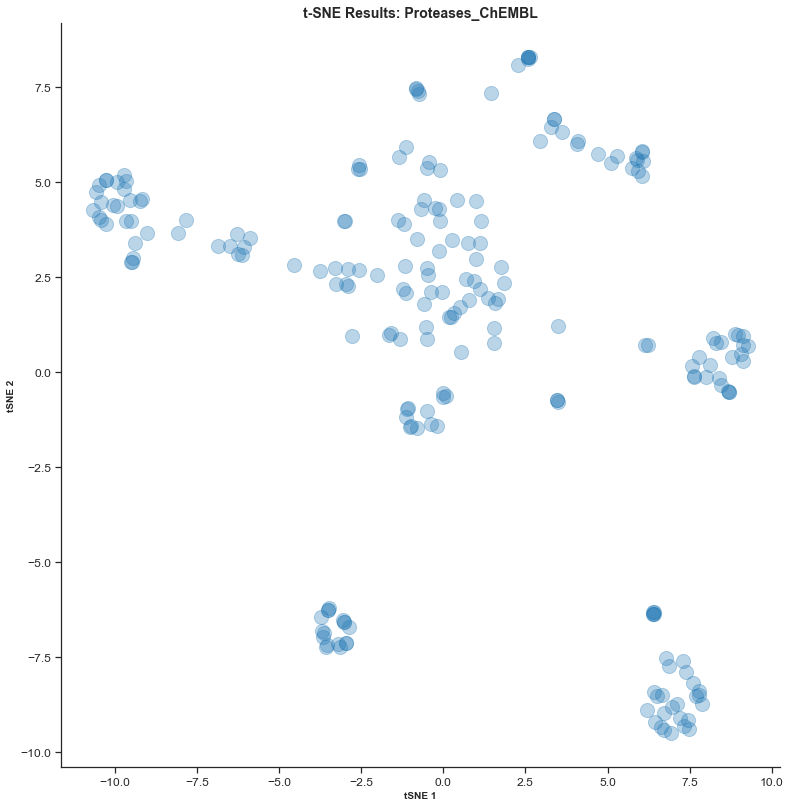

In [22]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


#ax=sns.scatterplot(x='TC1',y='TC2',data=tsne_result,s=15,linewidth=0.2,alpha=1)
ax=sns.lmplot(x='TC1',y='TC2',data=tsne_result,fit_reg=False, legend=True,height=11,scatter_kws={"s":200, "alpha":0.3})        

plt.title('t-SNE Results: Proteases_ChEMBL', weight='bold').set_fontsize('14')
plt.xlabel ('tSNE 1', weight='bold').set_fontsize('10')
plt.ylabel ('tSNE 2', weight='bold').set_fontsize('10')


In [23]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] # To explore the "best" number of cluster to clasify our molecules
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(tsne_result[['TC1','TC2']])
    silhouette_avg = silhouette_score(tsne_result[['TC1','TC1']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg) #This will print the silhouette score, as higher as our data is better distributed inside the clusters

For n_clusters = 2 The average silhouette_score is : 0.31691435
For n_clusters = 3 The average silhouette_score is : 0.25906378
For n_clusters = 4 The average silhouette_score is : 0.32813013
For n_clusters = 5 The average silhouette_score is : 0.31118593
For n_clusters = 6 The average silhouette_score is : 0.30987662
For n_clusters = 7 The average silhouette_score is : 0.23703676
For n_clusters = 8 The average silhouette_score is : 0.23235369
For n_clusters = 9 The average silhouette_score is : 0.2274498
For n_clusters = 10 The average silhouette_score is : 0.23572929


In [24]:
kmeans = KMeans(n_clusters=4, random_state=10) # We define the best number of clusters (3)
clusters = kmeans.fit(tsne_result[['TC1','TC2']]) #TC1vs TC2

tsne_result['Cluster'] = pd.Series(clusters.labels_, index=tsne_result.index)
tsne_result.head(5) #The tSNE table now contains the numer of cluster for each element

,TC1,TC2,Cluster
0,6.384309,-6.320334,1
1,6.390071,-6.382378,1
2,7.291758,-7.621020,1
3,-0.822113,7.458833,2
4,-0.781684,7.399560,2


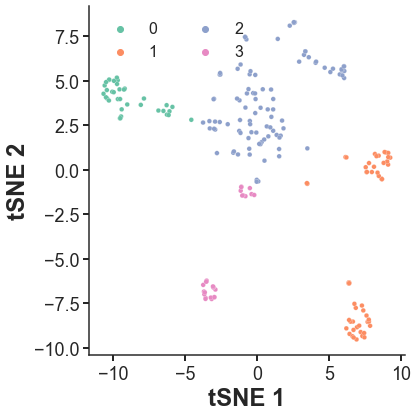

In [25]:
plt.rcParams['axes.linewidth'] = 1.5
fig, ax = plt.subplots(figsize=(6,6))

ax=sns.scatterplot(x='TC1',y='TC2',data=tsne_result, hue='Cluster',s=22,palette=sns.color_palette("Set2", 4),linewidth=0.2,alpha=1)
        

plt.xlabel ('tSNE 1',fontsize=24,fontweight='bold')

plt.ylabel ('tSNE 2',fontsize=24,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=18)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles=handles[1:], labels=labels[1:])

plt.legend(loc='best',frameon=False,prop={'size': 16},ncol=2)

plt.tight_layout()
plt.show()

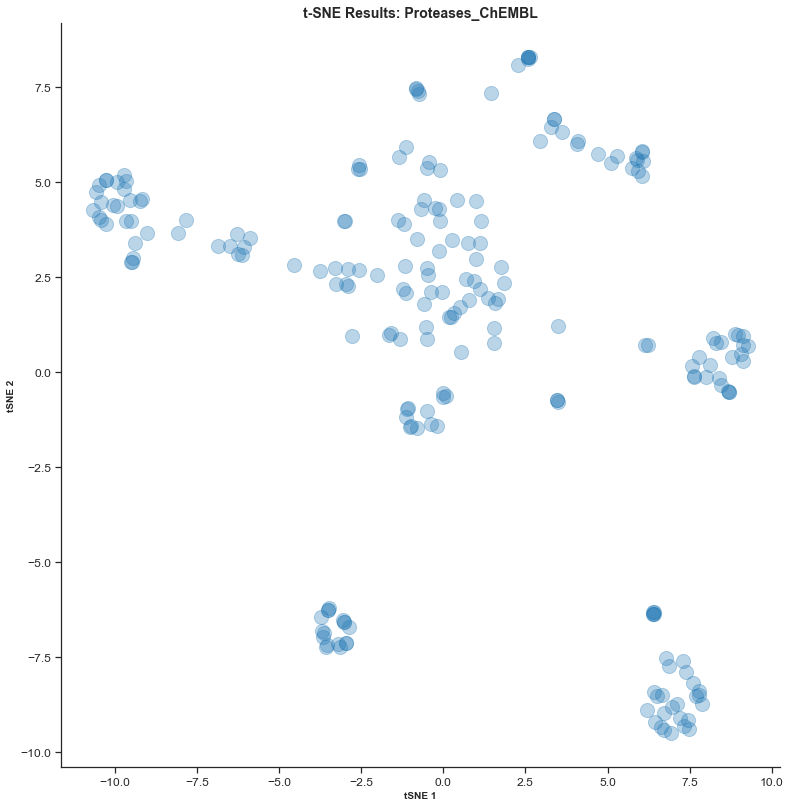

In [26]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")


#ax=sns.scatterplot(x='TC1',y='TC2',data=tsne_result,s=15,linewidth=0.2,alpha=1)
ax=sns.lmplot(x='TC1',y='TC2',data=tsne_result,fit_reg=False, legend=True,height=11,palette=sns.color_palette("Set2", 4),scatter_kws={"s":200, "alpha":0.3})        

plt.title('t-SNE Results: Proteases_ChEMBL', weight='bold').set_fontsize('14')
plt.xlabel ('tSNE 1', weight='bold').set_fontsize('10')
plt.ylabel ('tSNE 2', weight='bold').set_fontsize('10')



In [27]:
data_space2 = pd.concat([data_space,tsne_result], axis=1)
data_space2.head(5)

,SYNONYMS,SMILES,SMILES_CANONICAL,TC1,TC2,Cluster
0,0,CC[C@H](C)[C@H](NC(=O)[C@H](CCCCNC(=O)OCc1cccc...,CC[C@@H]([C@@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N...,6.384309,-6.320334,1
1,1,CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@H](C(=O)N[C@@...,CC[C@@H]([C@@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N...,6.390071,-6.382378,1
2,2,CC[C@H](C)[C@H](NC(=O)[C@H](CCCCN)NC(C)=O)C(=O...,NCCCC[C@@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H...,7.291758,-7.621020,1
3,3,CC(C)N(C)C(=O)n1cnc(S[C@@H]2C[C@H]3CC[C@@H]2C3)n1,CC(N(C(=O)n1cnc(n1)S[C@@H]1C[C@@H]2C[C@H]1CC2)C)C,-0.822113,7.458833,2
4,4,CC(C)N(C)C(=O)n1cnc(S(=O)(=O)C2CC3CCC2C3)n1,CC(N(C(=O)n1cnc(n1)S(=O)(=O)C1CC2CC1CC2)C)C,-0.781684,7.399560,2


In [16]:
data_space3 = pd.concat([data_space,tsne_result2], axis=1)
data_space3.head(5)

,SYNONYMS,SMILES,SMILES_CANONICAL,TC1,TC2,TC3
0,0,CC[C@H](C)[C@H](NC(=O)[C@H](CCCCNC(=O)OCc1cccc...,CC[C@@H]([C@@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N...,-1.390171,-73.734741,-27.567196
1,1,CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@H](C(=O)N[C@@...,CC[C@@H]([C@@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N...,66.020401,-77.007561,-138.375854
2,2,CC[C@H](C)[C@H](NC(=O)[C@H](CCCCN)NC(C)=O)C(=O...,NCCCC[C@@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H...,32.073093,-130.824768,-100.654739
3,3,CC(C)N(C)C(=O)n1cnc(S[C@@H]2C[C@H]3CC[C@@H]2C3)n1,CC(N(C(=O)n1cnc(n1)S[C@@H]1C[C@@H]2C[C@H]1CC2)C)C,3.277392,141.287033,71.800072
4,4,CC(C)N(C)C(=O)n1cnc(S(=O)(=O)C2CC3CCC2C3)n1,CC(N(C(=O)n1cnc(n1)S(=O)(=O)C1CC2CC1CC2)C)C,62.388550,-145.910995,95.676010


In [33]:
import plotly.express as px
from sklearn.decomposition import PCA

df = data_space3
X = data_space3[['TC1', 'TC2', 'TC3']]

components = X
total_var = X.sum() * 100 #total_var = efetuar o std do componentes do t-SNE e fazer a soma

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Tasks'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

TypeError: unsupported format string passed to Series.__format__

In [29]:
import plotly.express as px
from sklearn.decomposition import PCA

df = data_space2
X = data_space2[['TC1', 'TC2', 'Cluster']]

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['SYNONYMS'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0':'TC 1' , '1': 'TC 2', '2':'Cluster' }
)
fig.show()

NameError: name 'components' is not defined

# Reduction of dimensionality Global - Chemical Space #

In [40]:
import os
import time
from typing import List

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from rdkit import Chem, DataStructs
from rdkit.Chem.rdchem import Mol
from rdkit.Chem.MolStandardize.rdMolStandardize import LargestFragmentChooser

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

In [41]:
# Silence non-critical RDKit warnings to minimize unnecessary outputs
from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

In [42]:
def get_largest_fragment_from_smiles(s: str):
    mol = Chem.MolFromSmiles(s)
    if mol:
        clean_mol = LargestFragmentChooser().choose(mol)
        return Chem.MolToSmiles(clean_mol)
    return None

def compute_ecfp_descriptors(smiles_list: List[str]):
    """ Computes ecfp descriptors """
    
    keep_idx = []
    descriptors = []
    for i, smiles in enumerate(smiles_list):
        ecfp = _compute_single_ecfp_descriptor(smiles)
        if ecfp is not None:
            keep_idx.append(i)
            descriptors.append(ecfp)

    return np.vstack(descriptors), keep_idx

def _compute_single_ecfp_descriptor(smiles: str):
    try:
        mol = Chem.MolFromSmiles(smiles)
    except Exception as E:
        return None

    if mol:
        fp = Chem.AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
        return np.array(fp)
    
    return None

# Embed dataset with UMAP, PCA, t-SNE (Dataset-Specific Embeddings) #

In [43]:
data_set = '../data/smiles_curated.csv'

data_space = pd.read_csv(data_set, delimiter=';', low_memory=False)

data_space.head(5)

,SYNONYMS,SMILES,SMILES_CANONICAL
0,0,CC[C@H](C)[C@H](NC(=O)[C@H](CCCCNC(=O)OCc1cccc...,CC[C@@H]([C@@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N...
1,1,CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@H](C(=O)N[C@@...,CC[C@@H]([C@@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N...
2,2,CC[C@H](C)[C@H](NC(=O)[C@H](CCCCN)NC(C)=O)C(=O...,NCCCC[C@@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H...
3,3,CC(C)N(C)C(=O)n1cnc(S[C@@H]2C[C@H]3CC[C@@H]2C3)n1,CC(N(C(=O)n1cnc(n1)S[C@@H]1C[C@@H]2C[C@H]1CC2)C)C
4,4,CC(C)N(C)C(=O)n1cnc(S(=O)(=O)C2CC3CCC2C3)n1,CC(N(C(=O)n1cnc(n1)S(=O)(=O)C1CC2CC1CC2)C)C


In [54]:
# Compute desrciptors and keep track of which failed to featurize

#Calculate descriptors
fps  = [AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=2048) for x in smi] # Morgan
#fps =  [MACCSkeys.GenMACCSKeys(x) for x in smi] # MACCSKeys
ecfp_descriptors, keep_idx = compute_ecfp_descriptors(data_set["SMILES_CANONICAL"])

# Only keep those that sucessfully featurized
data_set = data_set.iloc[keep_idx]

# Calculate computational cost per reduction method with descriptor-related # 

In [55]:
%%time
umap_model = umap.UMAP(metric = "jaccard",
                      n_neighbors = 25,
                      n_components = 2,
                      low_memory = False,
                      min_dist = 0.001)
X_umap = umap_model.fit_transform(fps2)
bbbp["UMAP_0"], bbbp["UMAP_1"] = X_umap[:,0], X_umap[:,1]

C:\ProgramData\Anaconda3\lib\site-packages\umap\umap_.py:1802: UserWarning:

gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable



ValueError: Length of values (214) does not match length of index (2039)

In [8]:
%%time
pca = PCA(n_components=2)
X_pca = pca.fit_transform(ecfp_descriptors)
bbbp["PCA_0"], bbbp["PCA_1"] = X_pca[:,0], X_pca[:,1]

Wall time: 198 ms


In [9]:
%%time
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(ecfp_descriptors)
bbbp["TNSE_0"], bbbp["TNSE_1"] = X_tsne[:,0], X_tsne[:,1]

Wall time: 10.2 s


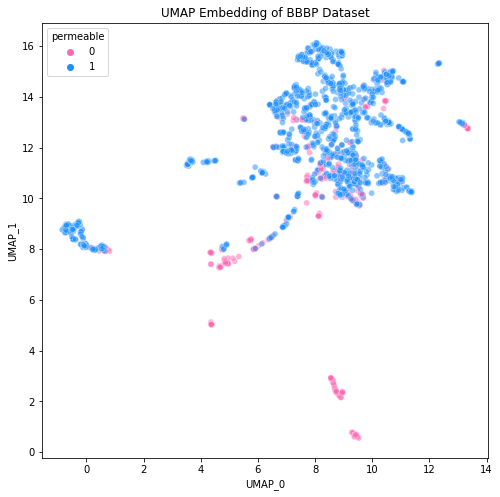

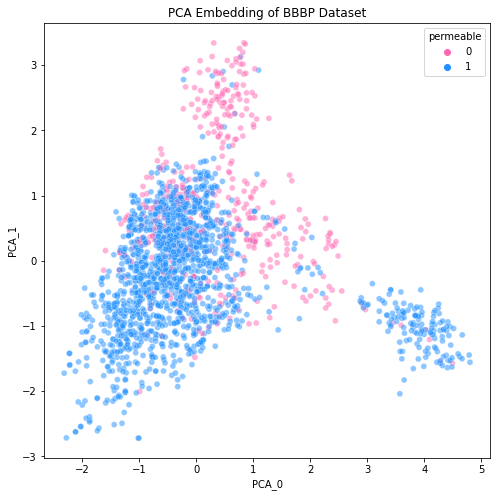

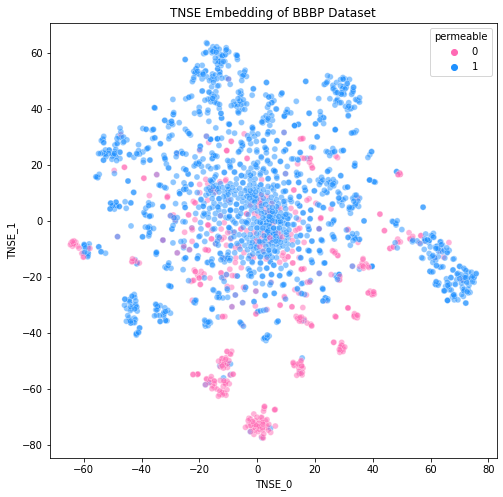

In [10]:
palette = sns.color_palette(["hotpink", "dodgerblue"])
for method in ["UMAP", "PCA", "TNSE"]:
    plt.figure(figsize=(8,8))
    sns.scatterplot(data=bbbp,
                    x=f"{method}_0",
                    y=f"{method}_1",
                    hue="permeable",
                    alpha=0.5,
                    palette=palette)
    plt.title(f"{method} Embedding of BBBP Dataset")
    plt.show()

# Embed BBBP in Global Chemical Space Approximation (Dataset-Agnostic Embedding) #